In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:



### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 



In [3]:

df=pd.read_csv('/content/drive/MyDrive/ineuron practice/practice/household_power_consumption.txt', sep=";")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# due to computation power taking sample of 100000 data points


df = df.sample(100000)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1760332,22/4/2010,04:16:00,0.278,0.000,241.910,1.200,0.000,0.000,1.0
765602,31/5/2008,09:26:00,1.554,0.194,238.910,6.600,0.000,1.000,18.0
46787,18/1/2007,05:11:00,0.312,0.136,242.670,1.400,0.000,0.000,0.0
1589498,24/12/2009,13:02:00,1.614,0.330,247.000,6.600,0.000,1.000,19.0
395978,17/9/2007,17:02:00,0.114,0.000,241.040,0.600,0.000,0.000,0.0


In [5]:
# shape

df.shape

(100000, 9)

In [6]:
# info

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1760332 to 2062519
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98727 non-null   float64
dtypes: float64(1), object(8)
memory usage: 7.6+ MB


In [7]:
# data types

df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
# column names


df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
# special characters in variables

for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))


The feature Global_active_power has (1273, 9) ? in it
The feature Global_reactive_power has (1273, 9) ? in it
The feature Voltage has (1273, 9) ? in it
The feature Global_intensity has (1273, 9) ? in it
The feature Sub_metering_1 has (1273, 9) ? in it
The feature Sub_metering_2 has (1273, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [10]:
### replacing ? values with nan values
df.replace('?', np.nan, inplace=True)

In [11]:
### checking no of records in each feature that have value as ? after replacing them
for feature in [feature for feature in df.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,df[df[feature]=='?'].shape))

The feature Global_active_power has (0, 9) ? in it
The feature Global_reactive_power has (0, 9) ? in it
The feature Voltage has (0, 9) ? in it
The feature Global_intensity has (0, 9) ? in it
The feature Sub_metering_1 has (0, 9) ? in it
The feature Sub_metering_2 has (0, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [12]:
### converting datatype of Date feature to datetime
df['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [13]:

### seperating day and month, creating new feature for day and month
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month

In [14]:
### dropping Time this is not important and Date is already used in day and month
df.drop('Time', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [15]:
### stripping . and zero from below mentioned features so it can be converted to integer
### converting to str datatype so replace function can be used.
df['Sub_metering_3']= df['Sub_metering_3'].astype(str)
df['Sub_metering_1']= df['Sub_metering_1'].str.split(".", expand=True)[0]
df['Sub_metering_2']= df['Sub_metering_2'].str.split(".", expand=True)[0]
df['Sub_metering_3']= df['Sub_metering_3'].str.split(".", expand=True)[0]

In [16]:
df['Sub_metering_3'] = df['Sub_metering_3'].replace('nan', 0)

In [17]:
# missing values

df.isnull().sum()

Global_active_power      1273
Global_reactive_power    1273
Voltage                  1273
Global_intensity         1273
Sub_metering_1           3410
Sub_metering_2           3410
Sub_metering_3              0
day                         0
month                       0
dtype: int64

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sub_metering_1,3410,3.410
Sub_metering_2,3410,3.410
Global_active_power,1273,1.273
Global_reactive_power,1273,1.273
Voltage,1273,1.273
Global_intensity,1273,1.273
Sub_metering_3,0,0.000
day,0,0.000
month,0,0.000


In [19]:
for i in df.columns:
  df[i].fillna(df[i].median(), inplace = True)

  

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Global_active_power,0,0.0
Global_reactive_power,0,0.0
Voltage,0,0.0
Global_intensity,0,0.0
Sub_metering_1,0,0.0
Sub_metering_2,0,0.0
Sub_metering_3,0,0.0
day,0,0.0
month,0,0.0


In [21]:
### creating dict of data type conversion
datatypes_convert={'Global_active_power':'float64', 'Global_reactive_power':'float64',
       'Voltage':'float64', 'Global_intensity':'float64', 'Sub_metering_1':'int64', 'Sub_metering_2':'int64',
                   'Sub_metering_3':'int64'}

In [22]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
1760332,0.278,0.000,241.910,1.200,0,0,1,22,4
765602,1.554,0.194,238.910,6.600,0,1,18,31,5
46787,0.312,0.136,242.670,1.400,0,0,0,18,1
1589498,1.614,0.330,247.000,6.600,0,1,19,24,12
395978,0.114,0.000,241.040,0.600,0,0,0,17,9


In [23]:
### changing data type of numerical features to float or int
df=df.astype(datatypes_convert)
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
day                        int64
month                      int64
dtype: object

In [24]:
# statistical analysis
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.087788,0.123999,240.846088,4.612154,1.085120,1.299570,6.390220,15.744500,6.450450
std,1.053944,0.112733,3.227824,4.431477,6.036209,5.856862,8.420508,8.802155,3.413646
min,0.076000,0.000000,224.540000,0.200000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.310000,0.048000,239.020000,1.400000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,0.606000,0.100000,241.020000,2.600000,0.000000,0.000000,1.000000,16.000000,6.000000
75%,1.524000,0.194000,242.860000,6.400000,0.000000,1.000000,17.000000,23.000000,9.000000
max,9.590000,1.364000,252.870000,41.200000,77.000000,77.000000,31.000000,31.000000,12.000000


In [25]:
#numerical columnns

numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
1760332,0.278,0.000,241.91,1.2,0,0,1,22,4
765602,1.554,0.194,238.91,6.6,0,1,18,31,5
46787,0.312,0.136,242.67,1.4,0,0,0,18,1
1589498,1.614,0.330,247.00,6.6,0,1,19,24,12
395978,0.114,0.000,241.04,0.6,0,0,0,17,9


In [26]:
# caterigorical columns

categorical_features = df.select_dtypes(exclude =np.number)
categorical_features.head()

""
1760332
765602
46787
1589498
395978


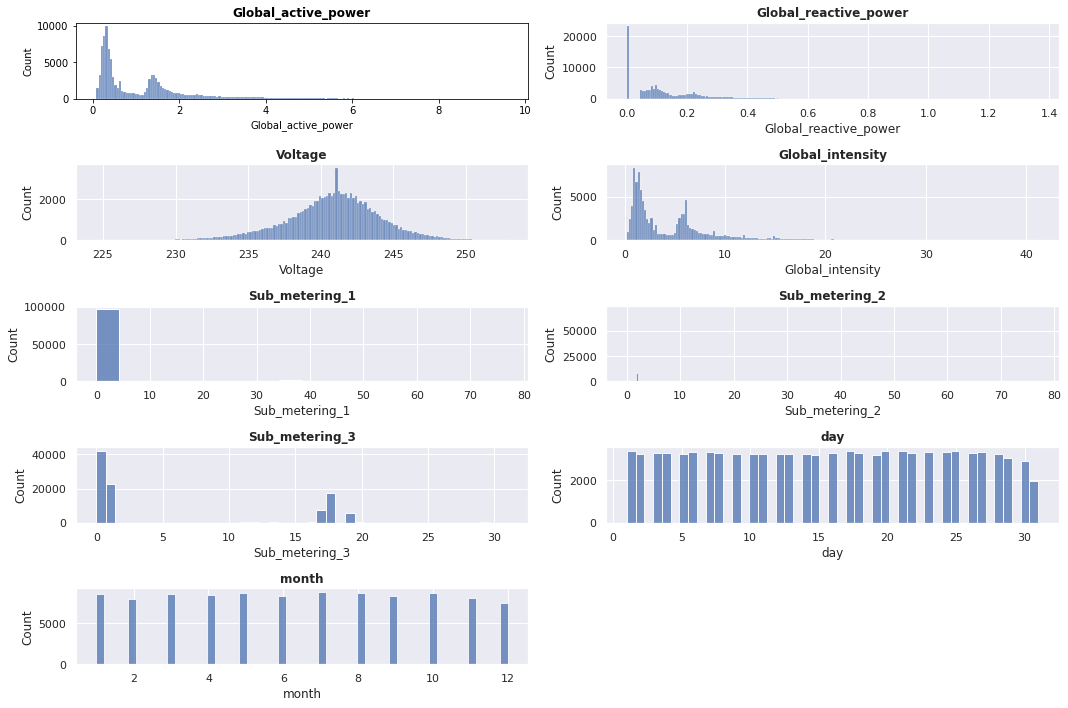

In [27]:
#unvariate analysis

# distribution of Numerical variables

### Checking outliers in numerical features

plt.figure(figsize=(15,10))
for i in enumerate(numerical_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=df, x=i[1], palette ='rainbow')
    plt.title("{}".format(i[1]), fontweight="bold")
    plt.tight_layout()
    plt.show

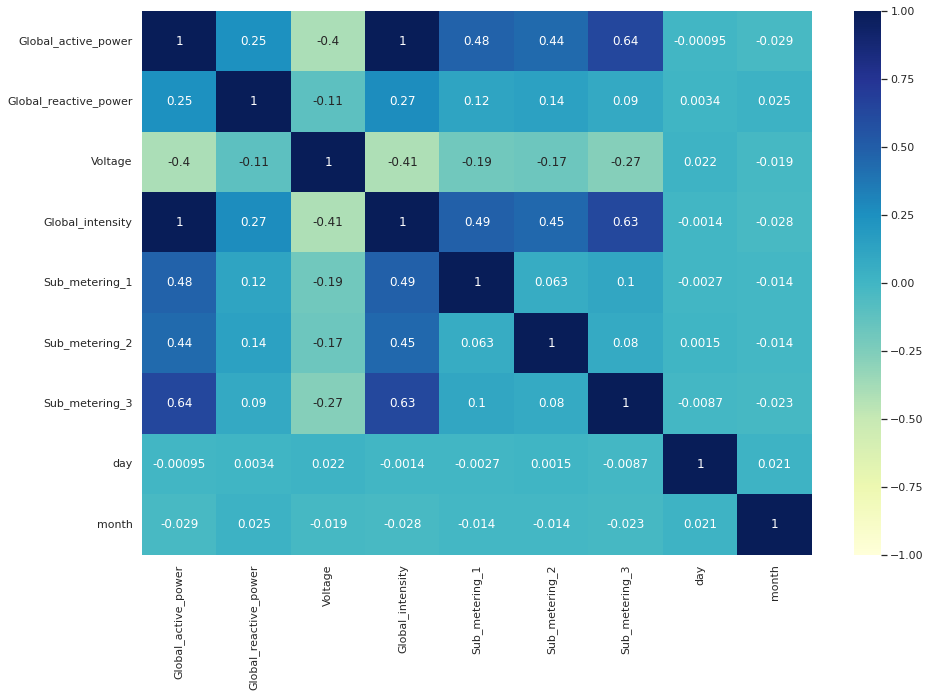

In [28]:
# correlation


### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

In [29]:
# correlation features



def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
     

In [30]:

corr_features = correlation(df, 0.75)
len(set(corr_features))

1

In [31]:
corr_features
     

{'Global_intensity'}

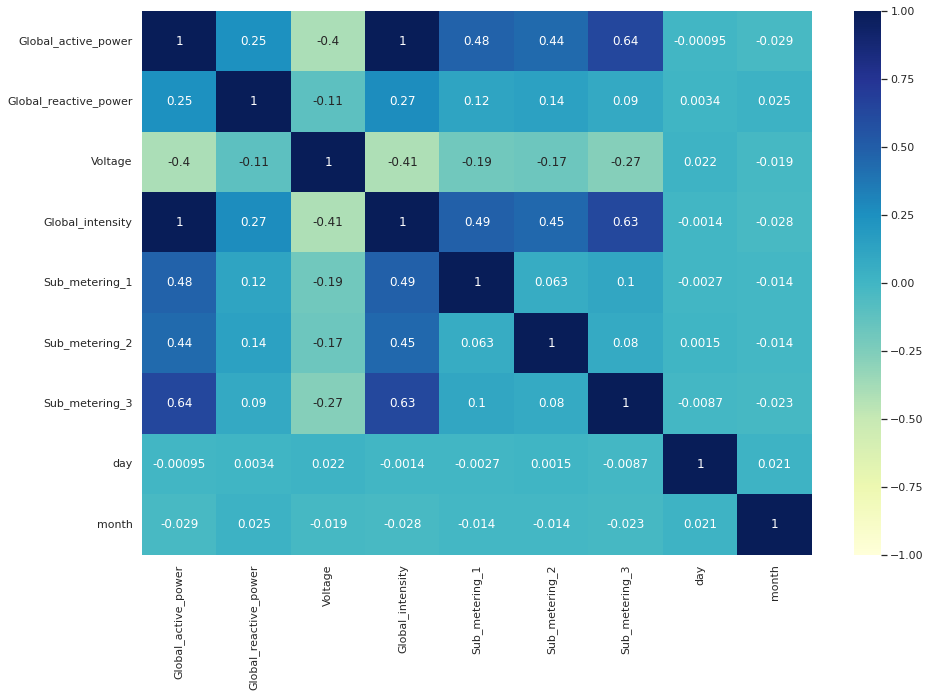

In [32]:
# correlation


### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

In [33]:
### Creating target feature as Total_power_use which is sum of Sub_metering_1,2 and 3
df['Total_power_use']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
1760332,0.278,0.000,241.91,1.2,0,0,1,22,4,1
765602,1.554,0.194,238.91,6.6,0,1,18,31,5,19
46787,0.312,0.136,242.67,1.4,0,0,0,18,1,0
1589498,1.614,0.330,247.00,6.6,0,1,19,24,12,20
395978,0.114,0.000,241.04,0.6,0,0,0,17,9,0


In [106]:
df['Total_power_use'].values

array([ 1, 19,  0, ...,  0,  5,  0])

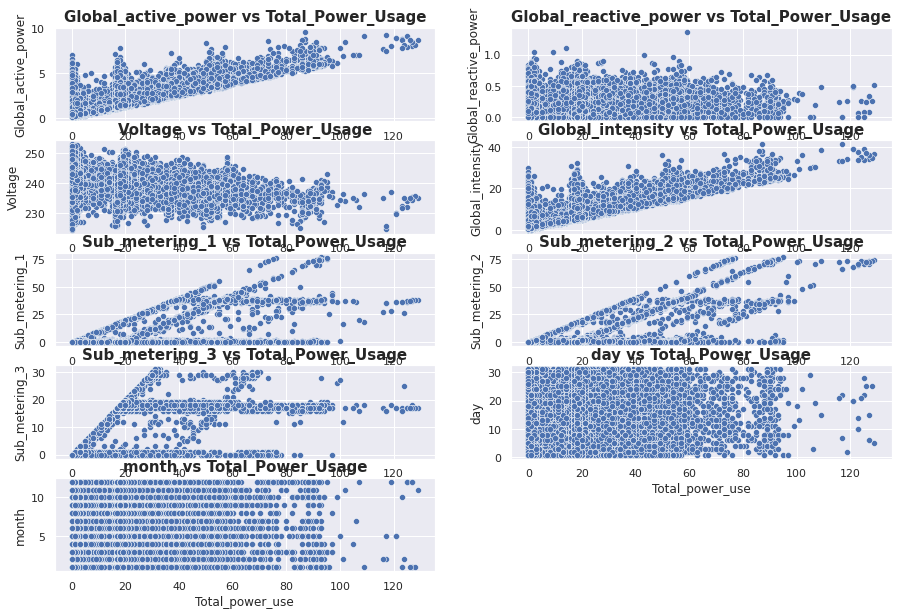

In [34]:
# Comparing Numerical features with Dependent feature

plt.figure(figsize=(15,10))
for i in enumerate([feature for feature in numerical_features if feature not in ['Total_power_use']]):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,8)})
    sns.scatterplot(data=df, y=i[1], x='Total_power_use')
    plt.title("{} vs Total_Power_Usage".format(i[1]),fontsize=15, fontweight="bold")

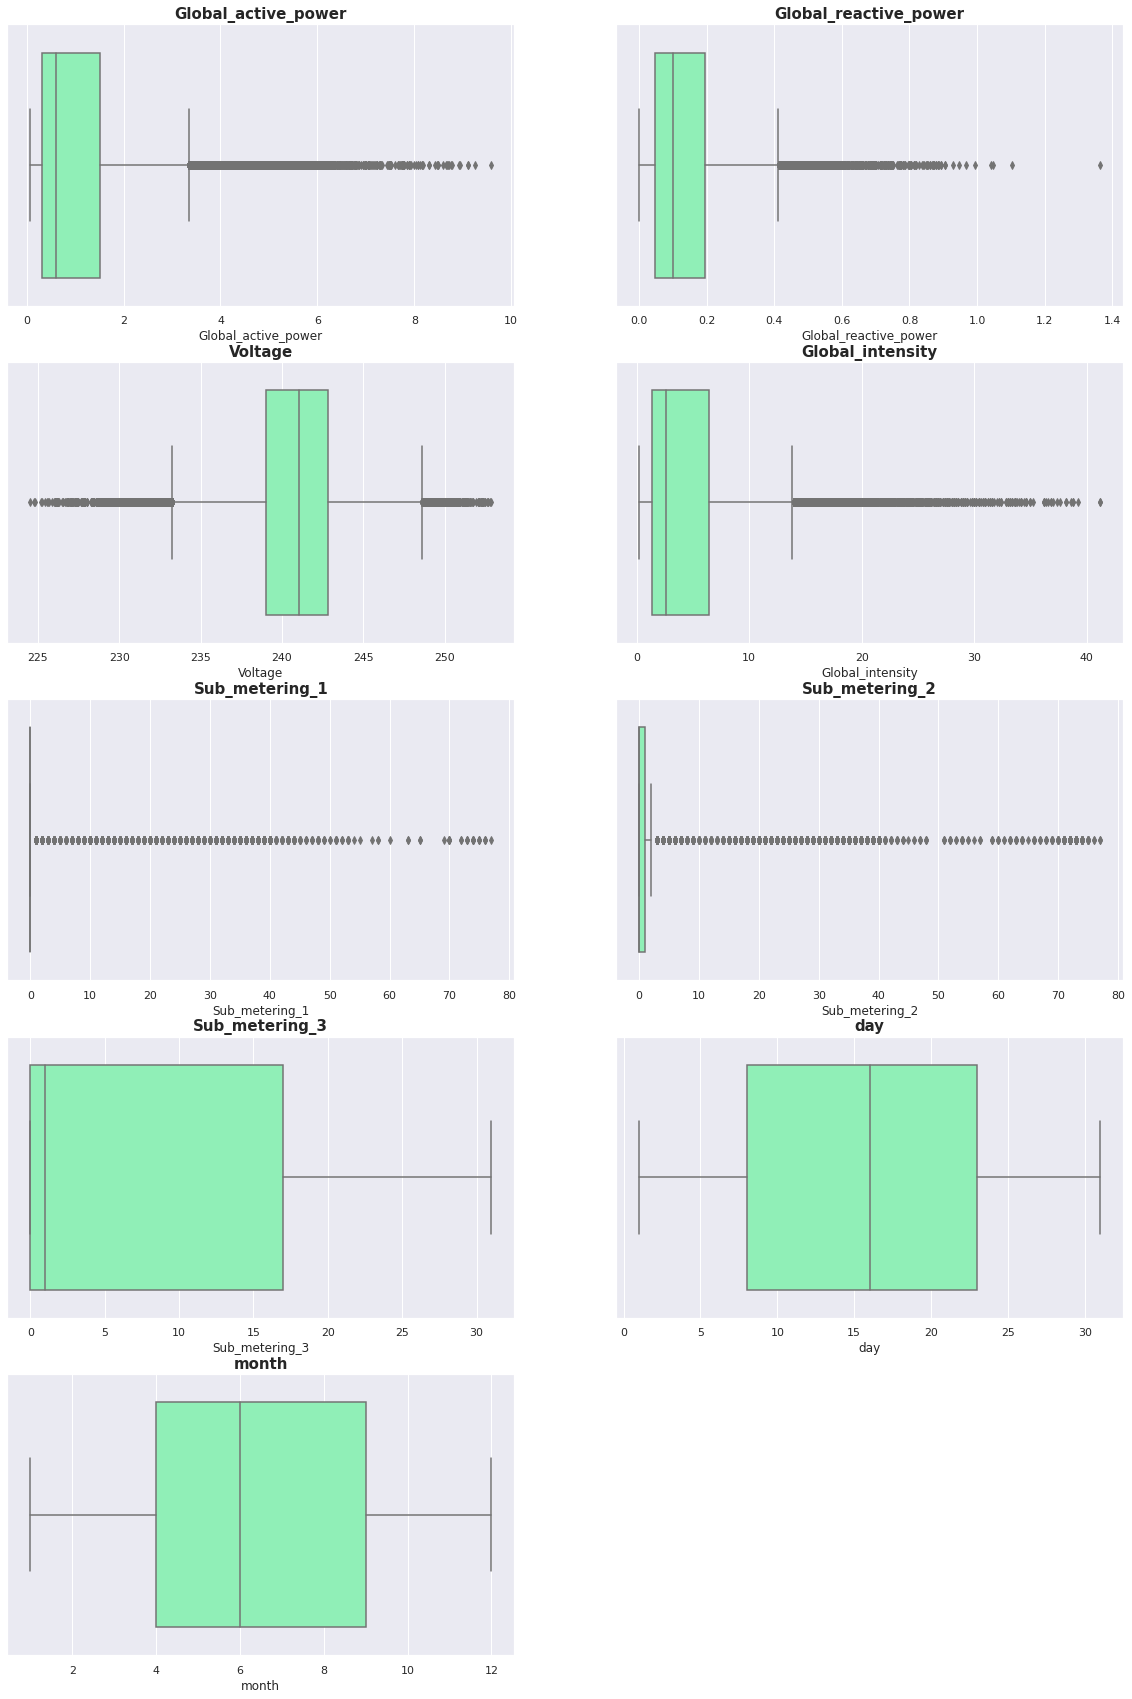

In [35]:
# #outliers

### Checking outliers in numerical features

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], palette = 'rainbow')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [36]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [37]:
### Capping outliers from numerical features
for feature in numerical_features:
    
    dataset=remove_outliers(df, feature)

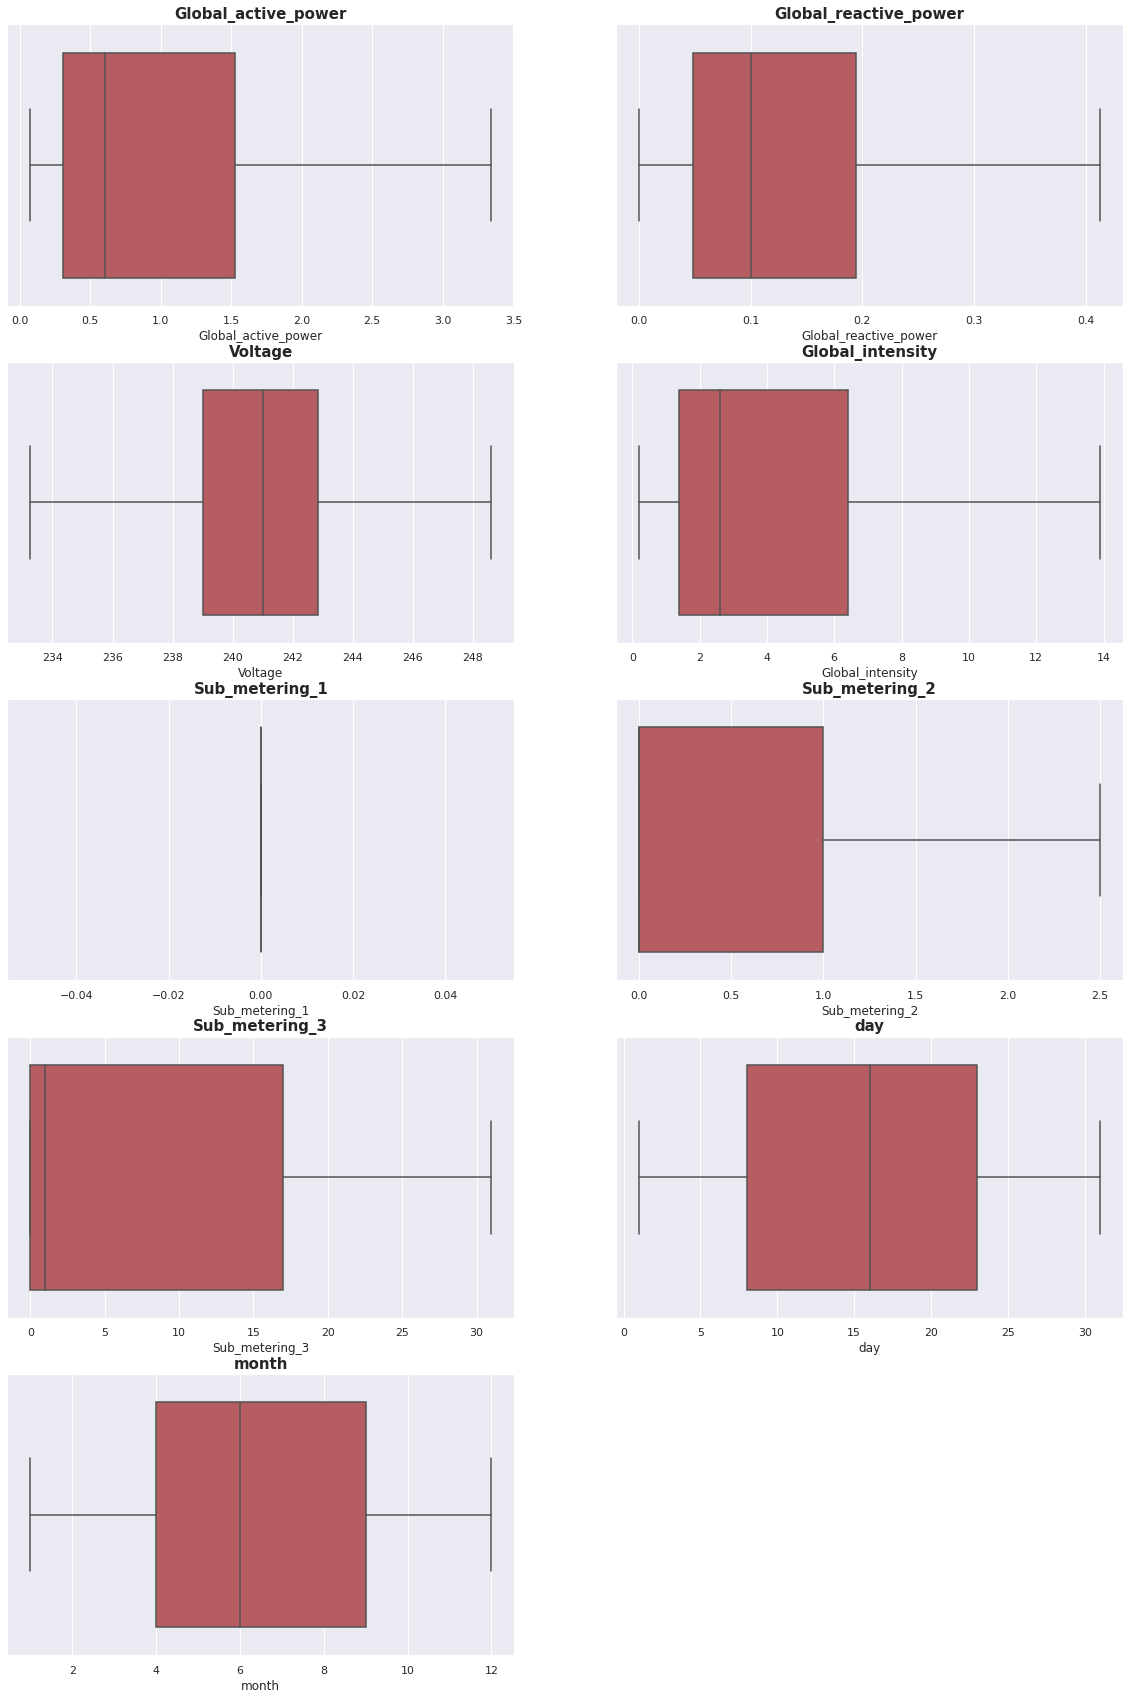

In [38]:

### Checking outliers in numerical features after capping

plt.figure(figsize=(20,30))
for feature in enumerate(numerical_features):
    plt.subplot(5, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=feature[1], color='r')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [39]:
### Splitting data into independent feature dataframe and dependent feature series
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
1760332,0.278,0.000,241.91,1.2,0,0.0,1.0,22.0,4.0
765602,1.554,0.194,238.91,6.6,0,1.0,18.0,31.0,5.0
46787,0.312,0.136,242.67,1.4,0,0.0,0.0,18.0,1.0
1589498,1.614,0.330,247.00,6.6,0,1.0,19.0,24.0,12.0
395978,0.114,0.000,241.04,0.6,0,0.0,0.0,17.0,9.0


In [40]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
68864,1.650,0.076,236.69,7.0,0,0.0,18.0,2.0,2.0
714380,2.816,0.413,238.85,12.2,0,0.0,0.0,25.0,4.0
916122,3.345,0.000,234.94,13.9,0,0.0,18.0,12.0,9.0
6021,3.345,0.078,236.53,13.9,0,0.0,17.0,20.0,12.0
941066,0.238,0.000,240.32,1.0,0,0.0,0.0,30.0,9.0


In [41]:

y_train.head()

68864     18
714380     0
916122    55
6021      17
941066     0
Name: Total_power_use, dtype: int64

In [42]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
1112617,1.540,0.050,241.84,6.4,0,0.0,18.0,27.0,1.0
516764,0.488,0.102,244.13,2.2,0,0.0,0.0,10.0,12.0
983773,0.764,0.058,237.49,3.2,0,0.0,0.0,29.0,10.0
342260,1.358,0.000,235.73,5.8,0,0.0,17.0,11.0,8.0
296361,0.154,0.000,239.23,1.0,0,0.0,0.0,10.0,7.0


In [43]:
y_test.head()

1112617    18
516764      0
983773      0
342260     17
296361      0
Name: Total_power_use, dtype: int64

In [44]:
### both will have same shape
X_train.shape, y_train.shape

((75000, 9), (75000,))

In [45]:

### both will have same shape
X_test.shape, y_test.shape

((25000, 9), (25000,))

In [46]:
#caling the data

scaler=StandardScaler()
scaler

StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.66486503, -0.43606209, -1.34083396, ...,  1.37546222,
        -1.56281393, -1.30626403],
       [ 1.9450332 ,  2.74349468, -0.64818264, ..., -0.75930512,
         1.05533094, -0.71997134],
       [ 2.5258299 , -1.15311347, -1.9020098 , ...,  1.37546222,
        -0.42449007,  0.7457604 ],
       ...,
       [ 1.21162639, -0.26623413, -0.85341266, ..., -0.75930512,
         0.48616901,  1.33205309],
       [-0.92930664, -0.11527595, -2.30284969, ..., -0.75930512,
         1.62449287,  0.1594677 ],
       [ 0.97447689,  1.48865477, -0.24734275, ..., -0.75930512,
        -0.993652  ,  1.62519944]])

In [48]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.54409445, -0.68136914,  0.31062637, ...,  1.37546222,
         1.28299571, -1.59941038],
       [-0.61091147, -0.19075504,  1.04496504, ..., -0.75930512,
        -0.65215485,  1.62519944],
       [-0.3078871 , -0.60589005, -1.08429644, ..., -0.75930512,
         1.51066049,  1.03890675],
       ...,
       [-0.63945725, -0.20962481,  0.67298563, ..., -0.75930512,
        -0.31065769, -1.30626403],
       [ 0.46724045, -0.68136914, -2.44073861, ...,  1.25686404,
         0.94149856, -0.71997134],
       [-0.86123595, -1.15311347,  0.57999077, ..., -0.75930512,
        -0.31065769, -0.71997134]])

In [49]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse=round(mean_squared_error(actual_val, pred_val),3)
    mae=round(mean_absolute_error(actual_val, pred_val),3)
    rmse=round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco=round(r2_score(actual_val, pred_val),4)
    adj_r2_sco=round(1-(1-r2_sco)*(len(actual_val)-1)/(len(actual_val)-X_test.shape[1]-1),4)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [50]:
### creating dictionary containing model objects for different algorithmn
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regresion":Lasso(),
    "Elastic-Net Regression":ElasticNet(),
    #"Support Vector Regressor":SVR(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Bagging Regressor": BaggingRegressor(base_estimator=LinearRegression()),
    "Extra Tree Regressor": ExtraTreesRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
    
}

In [51]:
### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [52]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [53]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Linear Regression Model

Model Performance for training dataset
Mean Square Error: 40.721
Mean Absolute Error: 3.581
Root Mean Square Error: 6.381
R2 Score: 0.7532
Adjusted R2 Score: 0.7532
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 41.444
Mean Absolute Error: 3.583
Root Mean Square Error: 6.438
R2 Score: 0.746
Adjusted R2 Score: 0.7459
**************************************************


Ridge Regression Model

Model Performance for training dataset
Mean Square Error: 40.721
Mean Absolute Error: 3.581
Root Mean Square Error: 6.381
R2 Score: 0.7532
Adjusted R2 Score: 0.7532
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 41.445
Mean Absolute Error: 3.582
Root Mean Square Error: 6.438
R2 Score: 0.746
Adjusted R2 Score: 0.7459
**************************************************


Lasso Regresion Model

Model Performance for training dataset
Mean Square Error: 43.318
Mean 

In [54]:
### for voting Regressor
r1= LinearRegression()
r2= Lasso()
r3= RandomForestRegressor() 
vr=VotingRegressor([('Linear_Regression', r1), ('Lasso', r2), ('Random_Forest_Regressor', r3)])

### Model prediction 
y_pred, pred_val=model_trainer(vr, X_train, y_train, X_test)

### Model evaluation for training data
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
print("Voting Regressor Model\n")
print("Model Performance for training dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
print("-"*50)

### Model evaluation for test data      
mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
print("Model Performance for Test dataset")
print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
model_list.append('Voting Regressor')
r2_score_list.append(r2_sco)
adj_r2_score.append(adj_r2_sco)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)
print("*"*50)
print("\n")

Voting Regressor Model

Model Performance for training dataset
Mean Square Error: 21.441
Mean Absolute Error: 2.341
Root Mean Square Error: 4.63
R2 Score: 0.87
Adjusted R2 Score: 0.87
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 28.508
Mean Absolute Error: 2.509
Root Mean Square Error: 5.339
R2 Score: 0.8253
Adjusted R2 Score: 0.8252
**************************************************




In [55]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,R2_score,Adjusted R2_score,MSE,MAE,RMSE
0,Random Forest Regressor,0.8861,0.8861,18.579,1.050,4.310
1,Extra Tree Regressor,0.8788,0.8788,19.783,1.053,4.448
2,XGBoost Regressor,0.8728,0.8728,20.761,1.339,4.556
3,GradientBoost Regressor,0.8727,0.8727,20.768,1.343,4.557
4,AdaBoost Regressor,0.8341,0.8340,27.071,2.264,5.203
5,Voting Regressor,0.8253,0.8252,28.508,2.509,5.339
6,Decision Tree Regressor,0.7953,0.7952,33.393,1.163,5.779
7,Linear Regression,0.7460,0.7459,41.444,3.583,6.438
8,Ridge Regression,0.7460,0.7459,41.445,3.582,6.438
9,Bagging Regressor,0.7460,0.7459,41.448,3.586,6.438


In [84]:


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)


In [ ]:
# new data prediction


In [85]:
X_train[0]


array([ 0.66486503, -0.43606209, -1.34083396,  0.68400686,  0.        ,
       -0.57505959,  1.37546222, -1.56281393, -1.30626403])

In [86]:
X_train[0].shape

(9,)

In [87]:
scaler.transform(X_train[0].reshape(1,-1))

array([[ -0.41672881,  -5.26730982, -77.67063599,  -0.98696097,
          0.        ,  -1.35819869,  -0.59617779,  -1.96837754,
         -2.27548325]])

XGBRegressor()

In [90]:
rf.predict(scaler.transform(X_train[0].reshape(1,-1)))

array([1.28])

In [96]:
# pickling


In [97]:
import pickle

pickle.dump(rf,open('rf.pkl','wb'))

In [99]:
pickled_model = pickle.load(open('rf.pkl','rb'))

In [100]:
pickled_model.predict(scaler.transform(X_train[0].reshape(1,-1)))

array([1.28])

In [108]:
# scaling


pickle.dump(scaler,open('scaler.pkl','wb'))